# Aglomerative Clustering

In [7]:
# Importamos las librerías necesarias

from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, manifold

from sklearn.cluster import AgglomerativeClustering

In [8]:
# Importamos el dataset digits desde el módulo datasets de sklearn
# A partir de él obtenemos un conjunto de entrenamiento y otro de test.
# Obtenemos el número de datos, de muestras y de características
digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

# En este contexto, la semilla de aleatoriedad se usa para garantizar 
# que los resultados del algoritmo de clustering sean reproducibles.

# El algoritmo de clustering agglomerativo funciona de forma iterativa, 
# fusionando los clusters más cercanos entre sí. 
# La forma en que se definen los clusters más cercanos depende del 
# método de distancia utilizado.

# Si no se establece una semilla de aleatoriedad, el método de distancia 
# puede elegir diferentes clusters más cercanos en cada iteración. 
# Esto puede dar lugar a resultados diferentes en cada ejecución del algoritmo.

# Al establecer una semilla de aleatoriedad, se garantiza que el método de 
# distancia siempre elija los mismos clusters más cercanos en cada iteración. 
# Esto hace que los resultados del algoritmo sean reproducibles.
np.random.seed(0)

In [6]:
# Función para visualizar el clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

Computing embedding
Done.


ward :	0.19s
average :	0.09s
complete :	0.08s
single :	0.04s


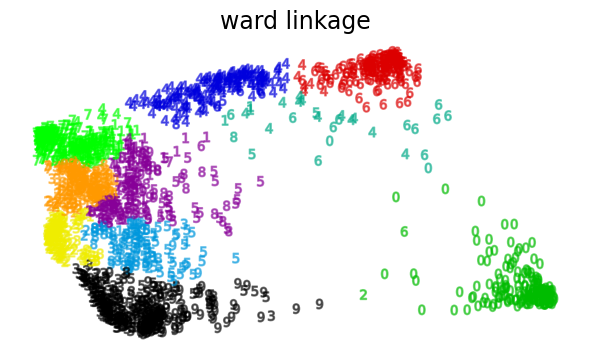

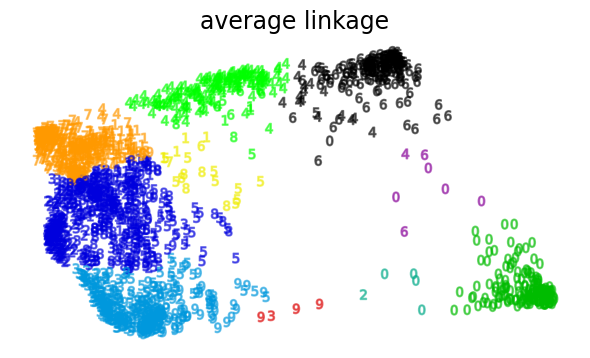

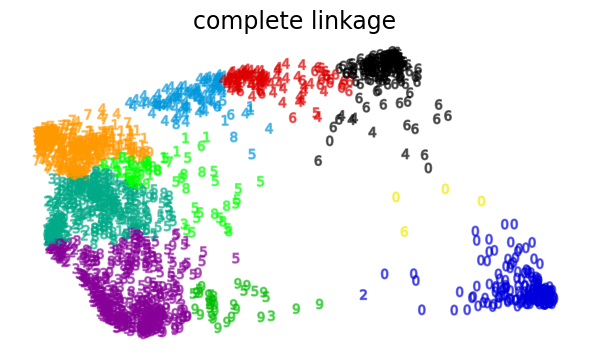

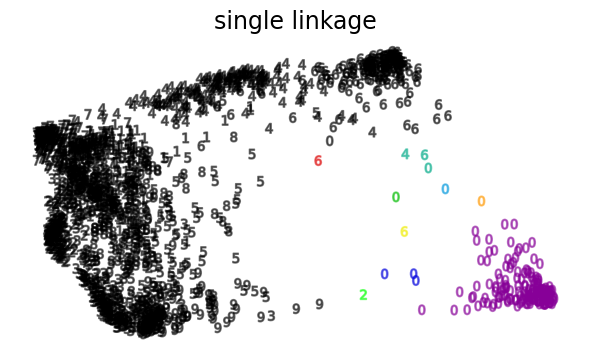

In [10]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()